## Importing libraries

In [20]:
import pandas as pd
import numpy as np
import sqlite3


import matplotlib.pyplot as plt
import seaborn as sns

######preprocessing text######
from preprocessing import remove_hashtags, ReplaceThreeOrMore, preprocessing_text


# import random

## Import Data from SQLite

In [42]:
#database connection
conn = sqlite3.connect( r"./data/emotion.db")
c = conn.cursor()

In [43]:
twitter_df = pd.read_sql_query("SELECT text,emotion FROM emotions;", conn)

## Exploratory Data Analysis

In [44]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339794 entries, 0 to 1339793
Data columns (total 2 columns):
text       1339794 non-null object
emotion    1339794 non-null object
dtypes: object(2)
memory usage: 20.4+ MB


In [45]:
twitter_df.shape

(1339794, 2)

__Reviewing Length of Texts__

In [46]:
twitter_df['len']= twitter_df['text'].apply(lambda x: len(x))

In [62]:
twitter_df.describe().T

,count,mean,std,min,25%,50%,75%,max
len,1339794.0,74.069728,31.909317,13.0,48.0,67.0,96.0,345.0


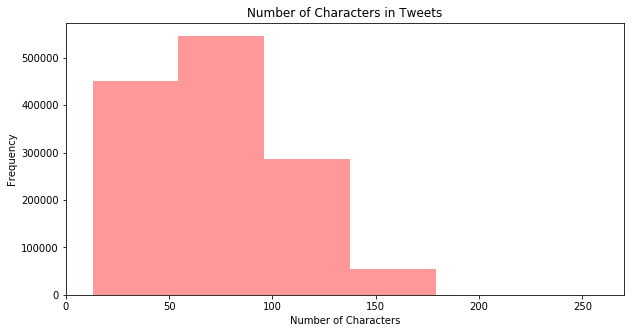

In [61]:
#Distribution of text lenghts
plt.figure(figsize=(10, 5))
sns.distplot(twitter_df['len'],
            color = 'Red',
            kde=False,
            bins = 8)
plt.xlim(0, 270)
# plt.ylim(0,500000)
plt.title("Number of Characters in Tweets")
plt.ylabel('Frequency')
plt.xlabel('Number of Characters')
plt.savefig('Tweets_Length.png')
plt.show()

In [8]:
twitter_df.sort_values('len', ascending = True).head()

,text,emotion,len
486415,O H I O #love,love,13
1050420,0 y va 2 #LOVE,love,14
323419,I'm a lil #sad,sadness,14
887226,T G I F #happy,joy,14
1225170,W o a h ! #sad,sadness,14


In [35]:
pd.set_option('display.max_colwidth', -1)
twitter_df.sort_values('len', ascending = False).head()


,text,emotion,len
382010,the part where optimus prime is resurrected &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;.&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; #love !,love,345
1252245,the ziti i cooked tonight &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt; ^__^ #LOVE,love,289
1057360,The feeling of leaving a final knowing you got a 100% and the EXTRACREDIT right #Thankful &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;,thankfulness,266
43710,Those ppl that fb chat you EVERY TIME you get online &lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt;&lt; #IRRITATING,anger,261
253288,#love @Harry_Styles &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3 &lt;3,love,260


__Counts by Emotion Label__

In [36]:
counts = pd.read_sql_query("""SELECT emotion, count(emotion) as count 
                            FROM emotions
                            GROUP BY emotion
                            ORDER BY count DESC;""", conn)

In [37]:
counts

,emotion,count
0,joy,386601
1,sadness,330432
2,anger,291480
3,love,167715
4,thankfulness,78228
5,fear,72094
6,surprise,13244


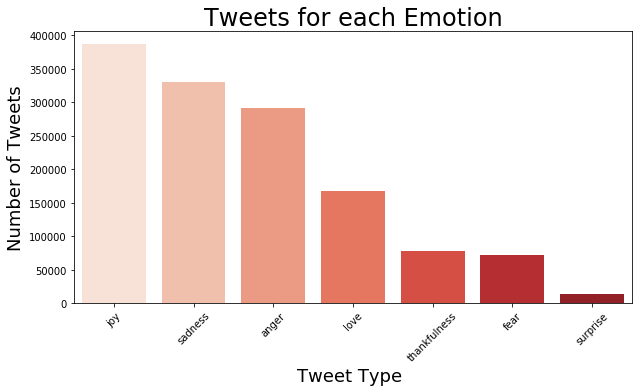

In [38]:
#Plotting by tweet emotion
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='emotion',
                 y='count',
                 data=counts,
                 palette = 'Reds'
                 
                 )
plt.title("Tweets for each Emotion", fontsize=24)
plt.ylabel('Number of Tweets', fontsize=18)
plt.xlabel('Tweet Type ', fontsize=18 )
plt.xticks(rotation=45)
plt.savefig('Tweets_Emotion.png')
plt.show()

## Data Clean and preprocessing:

- Will start by subsetting the data for emotions: joy, sadness, anger, and fear

In [39]:
twitter_df = twitter_df.loc[twitter_df.emotion.isin(['joy','fear','anger','sadness'])]

## Preprocessing

The following steps will be part of the preprocessing of the data:

- remove usernames
- remove hashtags (they were used for classification process, this will avoid leakage)
- handle emojis
- remove characters repeated more than 2 times
- removing links to websites
- remove html characters
- handle contractions
- remove numbers
- remove punctuation
- set to lowercase
- lemmatization


In [14]:
#create new column to have clean text
twitter_df['clean_text'] = twitter_df['text']

In [15]:
#preprocessing text
preprocessing_text(twitter_df,'clean_text')

,text,emotion,len,clean_text
5,If only everything could come with locally-gro...,joy,105,if only everything could come with locally gro...
7,Just walked into a magic shop in a leafy subur...,anger,89,just walked into a magic shop in a leafy subur...
11,Congratulations @justinbieber! My World 2.0 ha...,joy,134,congratulation my world ha been in the top for...
12,"Fall leaves, classical music, crisp breeze. #B...",joy,50,fall leaf classical music crisp breeze
13,Nothing makes you feel quite like a kid again ...,joy,79,nothing make you feel quite like a kid again l...
14,Red Lobster just denied me the right to relive...,sadness,114,red lobster just denied me the right to relive...
15,The Freedom Tower is a giant middle-finger sal...,joy,125,the freedom tower is a giant middle finger sal...
16,"Pô bicho, se LCD não tem nada a ver com LSD en...",sadness,116,pô bicho se lcd não tem nada a ver com lsd ent...
17,#dontactlike yu not nasty when yu had sex wit ...,sadness,109,yu not nasty when yu had sex wit two nigga in ...
19,many of u are seeing #NEVERSAYNEVER3D for the ...,joy,107,many of you are seeing for the first time nite...


In [16]:
#saving new data to sql table
twitter_df.to_sql("preprocessed", conn, if_exists='replace' , index = False)

In [17]:
pd.set_option('display.max_colwidth', -1)
twitter_df.head()

,text,emotion,len,clean_text
5,"If only everything could come with locally-grown, organic micro-greens… oh, wait, EVERYTHING DOES! #bliss",joy,105,if only everything could come with locally grown organic micro green oh wait everything doe
7,Just walked into a magic shop in a leafy suburb that didn't sell the herald sun. #outrage,anger,89,just walked into a magic shop in a leafy suburb that did not sell the herald sun
11,"Congratulations @justinbieber! My World 2.0 has been in the top 10 for 27 consecutive weeks, that hasn't been done since Nsync! #Proud",joy,134,congratulation my world ha been in the top for consecutive week that ha not been done since nsync
12,"Fall leaves, classical music, crisp breeze. #Bliss",joy,50,fall leaf classical music crisp breeze
13,Nothing makes you feel quite like a kid again like peeing in the ocean:) #bliss,joy,79,nothing make you feel quite like a kid again like peeing in the ocean


- Will start by subsetting the data to those posts where text length is more than 25 characters, very short texts can end up with a small amount of words or no words at all after preprocessing.
- Will apply undersampling to the data to avoid an unbalanced dataset for modeling.

In [18]:
#getting lenght again for preprocessed text
twitter_df['len']= twitter_df['clean_text'].apply(lambda x: len(x))

Text(0.5, 0, 'Number of Characters')

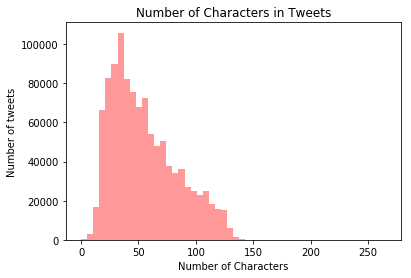

In [19]:
sns.distplot(twitter_df['len'],
            color = 'Red',
            kde=False)
plt.title("Number of Characters in Tweets")
plt.ylabel('Number of tweets')
plt.xlabel('Number of Characters',)

In [20]:
twitter_df.sort_values('len', ascending = True).head()

,text,emotion,len,clean_text
1317298,https://t.co/fdH3Td2O #Sad #Puvar !,sadness,0,
654266,7- 6.8 - 6.5- 4.7- 7- 6.8 #proud,joy,0,
12989,#FF &gt; --&gt; #HAPPY 11/11/11 @STIFF_CLICK @seriouslysexytv @EAT_her_TWEET @tiffanywedding @GadgetsWorld @BigFraud @Crimewatcher1,joy,0,
12992,#FF &gt; --&gt; #HAPPY 11/11/11 @Sneakerhead9510 @gl_Healthy @LoveSexnBeauty @TeamFollowHero @BargainGiftCard @LegitLegends @IndyLaserCenter,joy,0,
12995,#FF &gt; --&gt; #HAPPY 11/11/11 @KnittWittGlobal @mellyb36LS @LTDexperience @5Star_Promotion @TheFixYouNeed @Just4IPhone @PeaceLadyy,joy,0,


In [21]:
twitter_df.sort_values('len', ascending = False).head()

,text,emotion,len,clean_text
63827,Omg! My mom's friend was over for dinner and we started to talk about 1D and he said that he was gonna buy me there CD😃😄😃😄😃 #happy!!,joy,265,omg my mom s friend wa over for dinner and we started to talk about d and he said that he wa going to buy me there cd grinning_face_with_big_eyes grinning_face_with_smiling_eyes grinning_face_with_big_eyes grinning_face_with_smiling_eyes grinning_face_with_big_eyes
713358,Study history ☑ Study biology ☑ Make christmas wreath ☑ Make biology research ☑ History homework ☑ Filipino homework ☑ - #HAPPY,joy,238,study history ballot_box_with_check study biology ballot_box_with_check make christmas wreath ballot_box_with_check make biology research ballot_box_with_check history homework ballot_box_with_check filipino homework ballot_box_with_check
586437,"Bikini☑ water☑ sunblock☑ alcohol☑ and my favourite @Mr__Wess ☑ its gonna be one hek of a weekend, I've began counting baby, #excited",joy,219,bikini ballot_box_with_check water ballot_box_with_check sunblock ballot_box_with_check alcohol ballot_box_with_check and my favourite ballot_box_with_check it going to be one hek of a weekend i have began counting baby
979818,@ashleydeimel We will chill this week. 😃😃😃😃 and @PlatinumTebb can come too. 😄 I am off Tuesday and Thursday! #excited,joy,214,we will chill this week grinning_face_with_big_eyes grinning_face_with_big_eyes grinning_face_with_big_eyes grinning_face_with_big_eyes and can come too grinning_face_with_smiling_eyes i am off tuesday and thursday
792869,My family in guatemala were so proud of me when they heard I was working full time and being a full time student 😁😉😃😊 #proud,joy,214,my family in guatemala were so proud of me when they heard i wa working full time and being a full time student beaming_face_with_smiling_eyes winking_face grinning_face_with_big_eyes smiling_face_with_smiling_eyes


In [22]:
# #selecting posts with 25 characters or more
twitter_df = twitter_df.loc[twitter_df.len>25]

In [23]:
twitter_df.sort_values('len', ascending = True).head(5)

,text,emotion,len,clean_text
883785,This weekends better be fun! #excited,joy,26,this weekend better be fun
339472,Shut upppp you talk too much. #annoyed,anger,26,shut upp you talk too much
859222,so ready for winter breaaak! (((: #excited #snowboarding,joy,26,so ready for winter breaak
339697,Waiting on this phone call #nervous!!!,fear,26,waiting on this phone call
339699,Feeling wayyy better todayy! &lt;3 #happy,joy,26,feeling wayy better todayy


In [24]:
twitter_df.sort_values('len', ascending = True).tail(5)

,text,emotion,len,clean_text
979818,@ashleydeimel We will chill this week. 😃😃😃😃 and @PlatinumTebb can come too. 😄 I am off Tuesday and Thursday! #excited,joy,214,we will chill this week grinning_face_with_big_eyes grinning_face_with_big_eyes grinning_face_with_big_eyes grinning_face_with_big_eyes and can come too grinning_face_with_smiling_eyes i am off tuesday and thursday
792869,My family in guatemala were so proud of me when they heard I was working full time and being a full time student 😁😉😃😊 #proud,joy,214,my family in guatemala were so proud of me when they heard i wa working full time and being a full time student beaming_face_with_smiling_eyes winking_face grinning_face_with_big_eyes smiling_face_with_smiling_eyes
586437,"Bikini☑ water☑ sunblock☑ alcohol☑ and my favourite @Mr__Wess ☑ its gonna be one hek of a weekend, I've began counting baby, #excited",joy,219,bikini ballot_box_with_check water ballot_box_with_check sunblock ballot_box_with_check alcohol ballot_box_with_check and my favourite ballot_box_with_check it going to be one hek of a weekend i have began counting baby
713358,Study history ☑ Study biology ☑ Make christmas wreath ☑ Make biology research ☑ History homework ☑ Filipino homework ☑ - #HAPPY,joy,238,study history ballot_box_with_check study biology ballot_box_with_check make christmas wreath ballot_box_with_check make biology research ballot_box_with_check history homework ballot_box_with_check filipino homework ballot_box_with_check
63827,Omg! My mom's friend was over for dinner and we started to talk about 1D and he said that he was gonna buy me there CD😃😄😃😄😃 #happy!!,joy,265,omg my mom s friend wa over for dinner and we started to talk about d and he said that he wa going to buy me there cd grinning_face_with_big_eyes grinning_face_with_smiling_eyes grinning_face_with_big_eyes grinning_face_with_smiling_eyes grinning_face_with_big_eyes


In [25]:
#saving new data to sql table
twitter_df.to_sql("post_25_len", conn, if_exists='replace' , index = False)

In [26]:
#Review counts for subsetted data
twitter_df.emotion.value_counts()

joy        318870
sadness    288964
anger      260956
fear       60252 
Name: emotion, dtype: int64

## Undersampling 

- Will select the emotions fear, anger, joy, and sadness. 
- fear label has the smallest amount ** (~65k) of records
- Will select 80k random records for the other three labels 

In [27]:
fear = pd.read_sql_query("""SELECT text, emotion,clean_text  
                        FROM post_25_len 
                        WHERE emotion = 'fear'
                        """, conn)
fear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60252 entries, 0 to 60251
Data columns (total 3 columns):
text          60252 non-null object
emotion       60252 non-null object
clean_text    60252 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


In [28]:
joy = pd.read_sql_query("""SELECT text, emotion,clean_text  
                        FROM post_25_len 
                        WHERE emotion = 'joy'
                        ORDER BY RANDOM() LIMIT 80000;""", conn)
joy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
text          80000 non-null object
emotion       80000 non-null object
clean_text    80000 non-null object
dtypes: object(3)
memory usage: 1.8+ MB


In [29]:
anger = pd.read_sql_query("""SELECT text, emotion,clean_text  
                        FROM post_25_len  
                        WHERE emotion = 'anger'
                        ORDER BY RANDOM() LIMIT 80000;""", conn)
anger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
text          80000 non-null object
emotion       80000 non-null object
clean_text    80000 non-null object
dtypes: object(3)
memory usage: 1.8+ MB


In [30]:
sadness = pd.read_sql_query("""SELECT text, emotion,clean_text  
                        FROM post_25_len  
                        WHERE emotion = 'sadness'
                        ORDER BY RANDOM() LIMIT 80000;""", conn)
sadness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
text          80000 non-null object
emotion       80000 non-null object
clean_text    80000 non-null object
dtypes: object(3)
memory usage: 1.8+ MB


In [31]:
twitter_df = pd.concat([sadness, fear, joy, anger], axis = 0, sort=True)

In [32]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300252 entries, 0 to 79999
Data columns (total 3 columns):
clean_text    300252 non-null object
emotion       300252 non-null object
text          300252 non-null object
dtypes: object(3)
memory usage: 9.2+ MB


In [33]:
#Review counts for subsetted data
twitter_df.emotion.value_counts()

anger      80000
joy        80000
sadness    80000
fear       60252
Name: emotion, dtype: int64

In [34]:
#saving preprocessed data for any future rerun
twitter_df.to_sql("emotions_preprocessed_sample", conn, if_exists='replace' , index = False)
conn.commit()

In [35]:
conn.close()